# Entrenamiento del Modelo - Perceptrón Multicapa

En este notebook implementaremos un perceptrón multicapa para clasificación binaria utilizando el conjunto de datos de cáncer de mama de Wisconsin (WBCD).

Implementaremos las siguientes funcionalidades:
- Capas densas con diferentes activaciones
- Inicialización de pesos
- Forward pass
- Backpropagation
- Descenso del gradiente
- Función de pérdida (binary crossentropy)
- Entrenamiento del modelo

## Importación de librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import time
import sys
import os

# Añadir el directorio raíz al PATH para poder importar los módulos de utils
sys.path.append(os.path.abspath('../'))

# Importar funciones de la red neuronal
from utils.neural_network_functions import create_network

# Importar los hiperparámetros desde config.py
from utils.config import HIDDEN_LAYERS, LEARNING_RATE, EPOCHS, BATCH_SIZE, RANDOM_STATE, LR_DECAY, EARLY_STOPPING, PATIENCE

## Cargar los datos de entrenamiento y validación

In [2]:
# Cargar datos de entrenamiento y validación
train_data = pd.read_csv('../data/processed/train_set_normalized.csv')
validation_data = pd.read_csv('../data/processed/test_set_normalized.csv')

# Separar características y etiquetas
X_train = train_data.iloc[:, 1:].values  # Todas las columnas excepto la primera (diagnosis)
y_train = train_data.iloc[:, 0].values.reshape(-1, 1)  # Primera columna (diagnosis)

X_valid = validation_data.iloc[:, 1:].values
y_valid = validation_data.iloc[:, 0].values.reshape(-1, 1)

# Imprimir formas de los conjuntos de datos
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_valid shape: {X_valid.shape}")
print(f"y_valid shape: {y_valid.shape}")

X_train shape: (456, 30)
y_train shape: (456, 1)
X_valid shape: (113, 30)
y_valid shape: (113, 1)


## Verificar la normalización correcta de los datos

In [3]:
# Verificar estadísticas de los datos
print(f"X_train media: {np.mean(X_train):.3f}, std:  {np.std(X_train):.2f}, min: {np.min(X_train):.1f}, max: {np.max(X_train):.1f}")
print(f"X_valid media:  {np.mean(X_valid):.3f}, std:  {np.std(X_valid):.2f}, min: {np.min(X_valid):.1f}, max:  {np.max(X_valid):.1f}")

X_train media: -0.000, std:  1.00, min: -3.2, max: 11.6
X_valid media:  0.049, std:  0.99, min: -2.8, max:  7.4


## Entrenar el modelo

In [4]:
# Definir la arquitectura de la red
input_shape = X_train.shape[1]  # Número de características 30
hidden_layers = [25, 25]  # Dos capas ocultas con 25 neuronas cada una
output_shape = 1  # Clasificación binaria (1 neurona de salida)

# Crear la red neuronal
model = create_network(input_shape, hidden_layers, output_shape)

# Entrenar el modelo
print(f"Iniciando entrenamiento con {EPOCHS} épocas, batch_size={BATCH_SIZE}, learning_rate={LEARNING_RATE}")
start_time = time.time()

# Entrenar el modelo usando los Hiperparámetros importados de config.py
train_losses, valid_losses, train_accuracies, valid_accuracies = model.train(
    X_train, y_train, X_valid, y_valid,
    epochs=EPOCHS,                  # por ejemplo 1000
    batch_size=BATCH_SIZE,          # por ejemplo 8
    learning_rate=LEARNING_RATE,    # por ejemplo 0.01
    lr_decay=LR_DECAY,              # por ejemplo 0.95
    early_stopping=EARLY_STOPPING,  # Activar early stopping, por ejemplo True
    patience=PATIENCE               # Paciencia (épocas sin mejora), por ejemplo 50
)

training_time = time.time() - start_time
print(f"Entrenamiento completado en {training_time:.2f} segundos")

Iniciando entrenamiento con 9000 épocas, batch_size=8, learning_rate=0.01
epoch 01/9000 - loss: 0.666219123 - acc: 0.627193 - val_loss: 0.663593456 - val_acc: 0.628319
Tasa de aprendizaje ajustada a: 0.009500
epoch 11/9000 - loss: 0.647141959 - acc: 0.627193 - val_loss: 0.645156558 - val_acc: 0.628319
Tasa de aprendizaje ajustada a: 0.009025
epoch 21/9000 - loss: 0.629268781 - acc: 0.627193 - val_loss: 0.628003234 - val_acc: 0.628319
Tasa de aprendizaje ajustada a: 0.008574
epoch 31/9000 - loss: 0.611878482 - acc: 0.627193 - val_loss: 0.611062927 - val_acc: 0.628319
Tasa de aprendizaje ajustada a: 0.008145
epoch 41/9000 - loss: 0.593864051 - acc: 0.629386 - val_loss: 0.593489279 - val_acc: 0.628319
Tasa de aprendizaje ajustada a: 0.007738
epoch 51/9000 - loss: 0.575296597 - acc: 0.657895 - val_loss: 0.575217935 - val_acc: 0.654867
Tasa de aprendizaje ajustada a: 0.007351
epoch 61/9000 - loss: 0.555536850 - acc: 0.706140 - val_loss: 0.556108643 - val_acc: 0.707965
Tasa de aprendizaje aj

## Visualizar la curva de aprendizaje

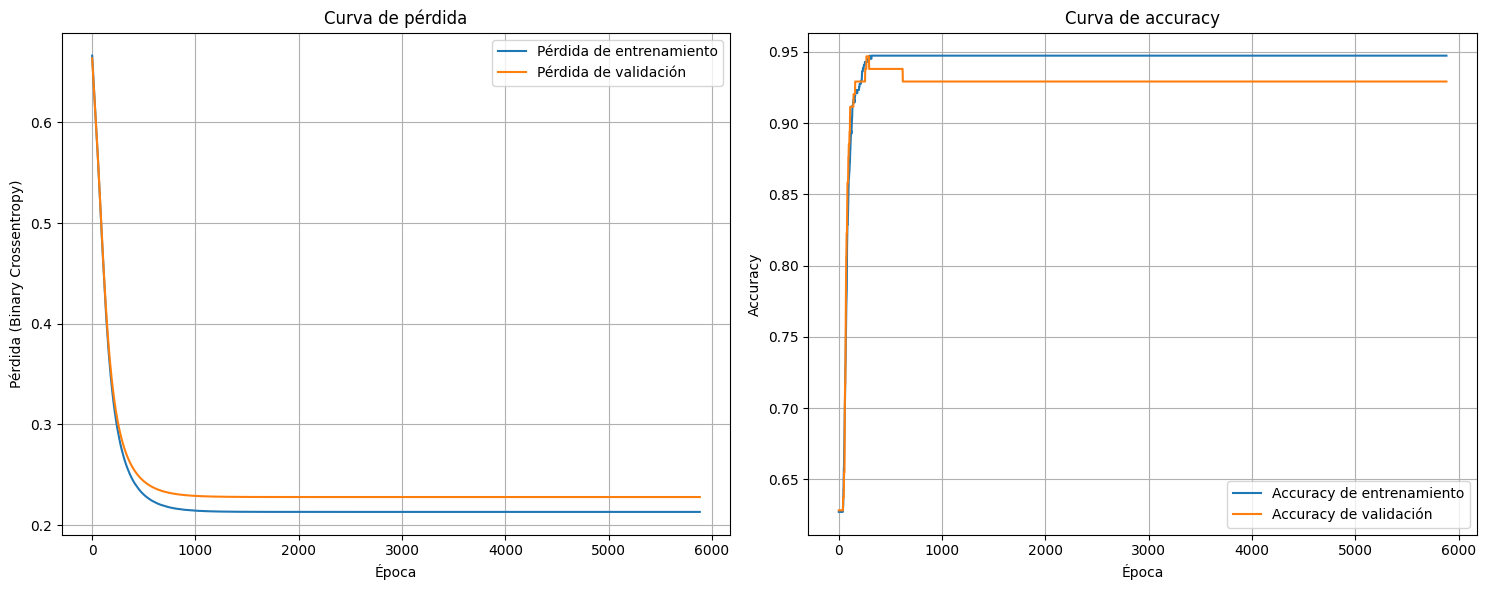

In [5]:
# Visualizar las curvas de aprendizaje
plt.figure(figsize=(15, 6))

# Subplot para la pérdida
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Pérdida de entrenamiento')
plt.plot(valid_losses, label='Pérdida de validación')
plt.title('Curva de pérdida')
plt.xlabel('Época')
plt.ylabel('Pérdida (Binary Crossentropy)')
plt.legend()
plt.grid(True)

# Subplot para la accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Accuracy de entrenamiento')
plt.plot(valid_accuracies, label='Accuracy de validación')
plt.title('Curva de accuracy')
plt.xlabel('Época')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Guardar la figura
output_dir = '../output/figures/'
os.makedirs(output_dir, exist_ok=True)
plt.savefig(os.path.join(output_dir, 'learning_curves.png'))
plt.tight_layout()
plt.show()

## Guardar el modelo entrenado

In [6]:
# Guardar el modelo
model_dir = '../output/models/'
os.makedirs(model_dir, exist_ok=True)
model_path = os.path.join(model_dir, 'trained_model.json')
model.save(model_path)

Modelo guardado en ../output/models/trained_model.json


## Guardar hiperparámetros y métricas de entrenamiento

In [7]:
# Guardar hiperparámetros y métricas
training_info = {
    'input_shape': input_shape,
    'hidden_layers': hidden_layers,
    'output_shape': output_shape,
    'epochs': EPOCHS,
    'batch_size': BATCH_SIZE,
    'learning_rate': LEARNING_RATE,
    'final_train_loss': train_losses[-1],
    'final_valid_loss': valid_losses[-1],
    'final_train_accuracy': train_accuracies[-1],
    'final_valid_accuracy': valid_accuracies[-1],
    'training_time_seconds': training_time
}

with open(os.path.join(model_dir, 'training_info.json'), 'w') as f:
    json.dump(training_info, f, indent=4)

print("\nInformación de entrenamiento guardada.")


Información de entrenamiento guardada.


## Evaluar el modelo entrenado

In [8]:
train_loss, train_acc = model.evaluate(X_train, y_train)
valid_loss, valid_acc = model.evaluate(X_valid, y_valid)

print(f"\nResultados finales:")
print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.4f}")
print(f"Valid Loss: {valid_loss:.4f}, Valid Accuracy: {valid_acc:.4f}")


Resultados finales:
Train Loss: 0.2131, Train Accuracy: 0.9474
Valid Loss: 0.2279, Valid Accuracy: 0.9292
